In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def parse_filename(filename):
    # Split the filename by underscores
    parts = filename.split('_')
    if len(parts) < 4:
        return None
    
    # Extract components from the filename
    ticker = parts[0]
    algorithm = parts[1]
    profit_str = parts[2].replace('PROFIT', '')
    winsize_str = parts[3].replace('WINSIZE', '')
    
    # Split to get iteration from the last part
    iter_part = parts[4].split('.')[0]  # Assuming 'ITER' is followed by the iteration number
    iteration = iter_part.replace('ITER', '')
    
    # Return structured information
    return {
        'ticker': ticker,
        'algorithm': algorithm,
        'profit': float(profit_str),
        'window_size': int(winsize_str),
        'iteration': int(iteration)
    }

def process_directory(root_path):
    # List to hold all parsed data
    all_data = []

    # Walk through each folder and subfolder
    for root, dirs, files in os.walk(root_path):
        for file in files:
            if file.endswith('.html'):
                parsed_data = parse_filename(file)
                if parsed_data:
                    all_data.append(parsed_data)
    return all_data

In [3]:
# List of tickers
ticker_list = ['BIIB', 'CVX', 'GL', 'FRT', 'GEN', 'KDP', 'MCD', 'MRO', 'NFLX', 'OKE', 'PEP', 'REG', 'O', 'TRGP', 'YUM']
all_ticker_data = []

# Loop over each ticker, process its directory, and collect the data
for ticker in ticker_list:
    root_path = f'{ticker}/'  # Update the path as needed
    ticker_data = process_directory(root_path)
    all_ticker_data.extend(ticker_data)

# Create a DataFrame from the collected data
df = pd.DataFrame(all_ticker_data)
df = df.sort_values(by=['ticker', 'algorithm', 'window_size', 'iteration'])
df

,ticker,algorithm,profit,window_size,iteration
0,BIIB,A2C,0.09,10,100
2,BIIB,A2C,0.38,30,100
1,BIIB,A2C,0.18,50,100
4,BIIB,DQN,0.50,10,100
5,BIIB,DQN,0.79,30,100
...,...,...,...,...,...
147,YUM,DQN,0.78,30,100
145,YUM,DQN,0.71,50,100
148,YUM,PPO,0.11,10,100
149,YUM,PPO,0.17,30,100


In [4]:
file_path = 'stock results.csv'
df.to_csv(file_path, index=False)

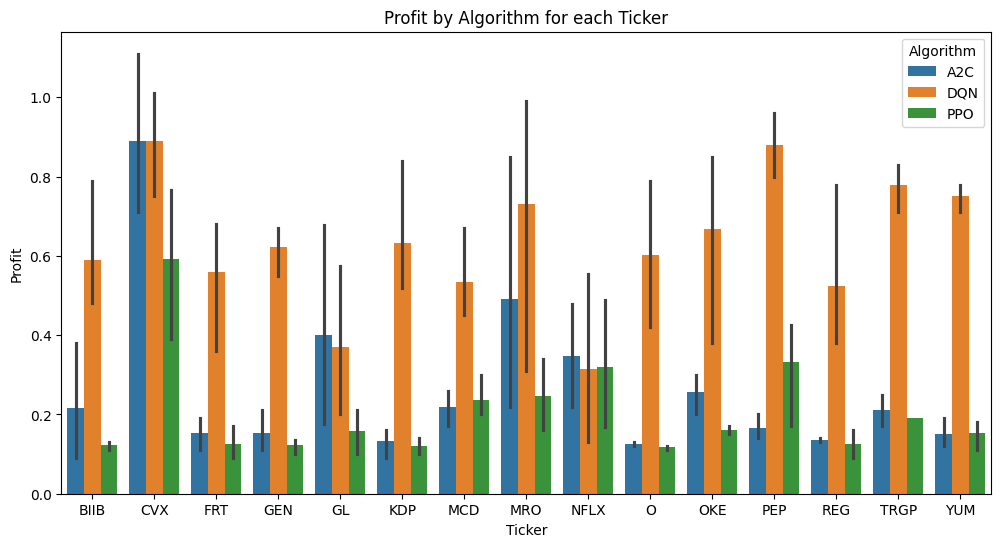

In [5]:
# Bar Plot: Profit by Algorithm for each Ticker
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='ticker', y='profit', hue='algorithm')
plt.title('Profit by Algorithm for each Ticker')
plt.xlabel('Ticker')
plt.ylabel('Profit')
plt.legend(title='Algorithm')
plt.show()

In [11]:
# # Line Plot: Profit vs. Window Size for each Algorithm per Ticker
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df, x='window_size', y='profit', hue='algorithm', style='ticker', markers=True, dashes=False)
# plt.title('Profit vs. Window Size for each Algorithm per Ticker')
# plt.xlabel('Window Size')
# plt.ylabel('Profit')
# plt.legend(title='Algorithm / Ticker')
# plt.show()

<Figure size 1000x600 with 0 Axes>

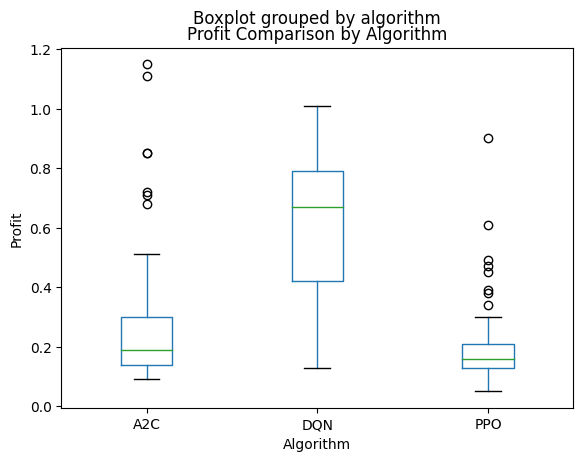

In [8]:
# Create a box plot to compare profits of different algorithms
plt.figure(figsize=(10, 6))
df.boxplot(column='profit', by='algorithm', grid=False)
plt.title('Profit Comparison by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Profit')
plt.show()

In [10]:
# Find the algorithm with the highest profit for each stock
best_algorithm_df = df.loc[df.groupby('ticker')['profit'].idxmax()]

# Group stocks together based on the best algorithm
stock_groups = best_algorithm_df.groupby('algorithm')['ticker'].apply(list)
stock_groups

algorithm
A2C                                            [CVX, GL]
DQN    [BIIB, FRT, GEN, KDP, MCD, MRO, NFLX, O, OKE, ...
Name: ticker, dtype: object